In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px

# Load the dataset
data = pd.read_csv("/kaggle/input/world-air-quality-index-by-city-and-coordinates/AQI and Lat Long of Countries.csv")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Section 1: Which city has the highest AQI value?
city_highest_aqi = data.loc[data['AQI Value'].idxmax(), 'City']
print("City with the highest AQI value:", city_highest_aqi)

City with the highest AQI value: Bahawalnagar


Top 5 cities with the highest AQI values:
              City  AQI Value
203   Bahawalnagar        500
445      Harunabad        500
578   Mahendragarh        500
1623       Phalodi        500
1808       Jodhpur        500


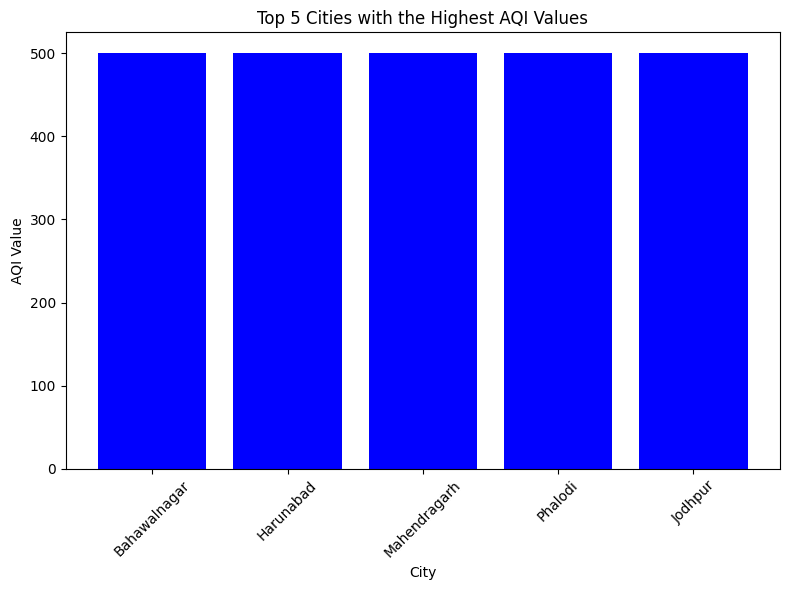

In [3]:
# Section 2: What are the top 5 cities with the highest AQI values?
top_5_cities_aqi = data.nlargest(5, 'AQI Value')
print("Top 5 cities with the highest AQI values:")
print(top_5_cities_aqi[['City', 'AQI Value']])

# Create a bar plot to visualize the top 5 cities with the highest AQI values
plt.figure(figsize=(8, 6))
plt.bar(top_5_cities_aqi['City'], top_5_cities_aqi['AQI Value'], color='b')
plt.xlabel('City')
plt.ylabel('AQI Value')
plt.title('Top 5 Cities with the Highest AQI Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 5 countries with the highest AQI values:
Country
Republic of Korea    421.0
Bahrain              188.0
Pakistan             184.2
Saudi Arabia         168.0
Mauritania           164.0
Name: AQI Value, dtype: float64


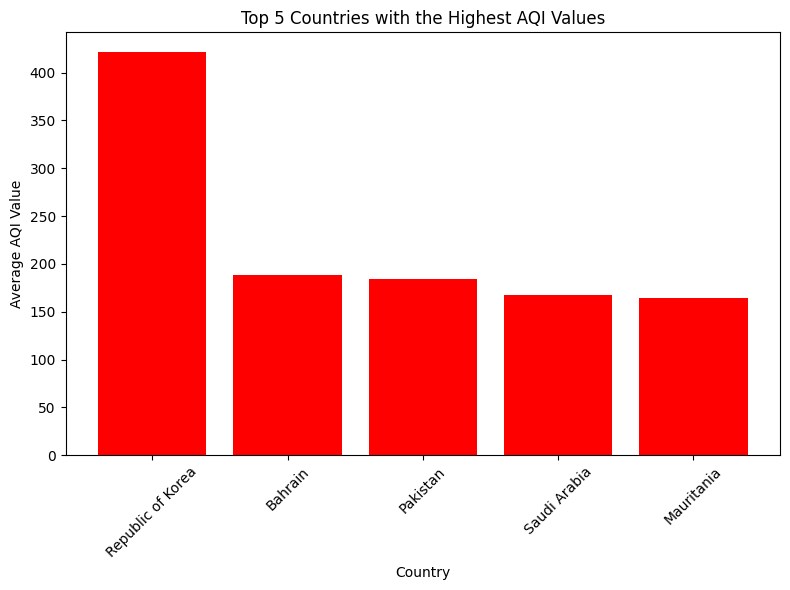

In [4]:
# Section 3: What are the top 5 cities with the highest AQI values?
top_5_countries_aqi = data.groupby('Country')['AQI Value'].mean().nlargest(5)

# Print the top 5 countries with the highest AQI values
print("Top 5 countries with the highest AQI values:")
print(top_5_countries_aqi)

# Create a bar plot to visualize the top 5 countries with the highest AQI values
plt.figure(figsize=(8, 6))
plt.bar(top_5_countries_aqi.index, top_5_countries_aqi.values, color='red')
plt.xlabel('Country')
plt.ylabel('Average AQI Value')
plt.title('Top 5 Countries with the Highest AQI Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Pollutant with the highest average AQI value: PM2.5 AQI Value


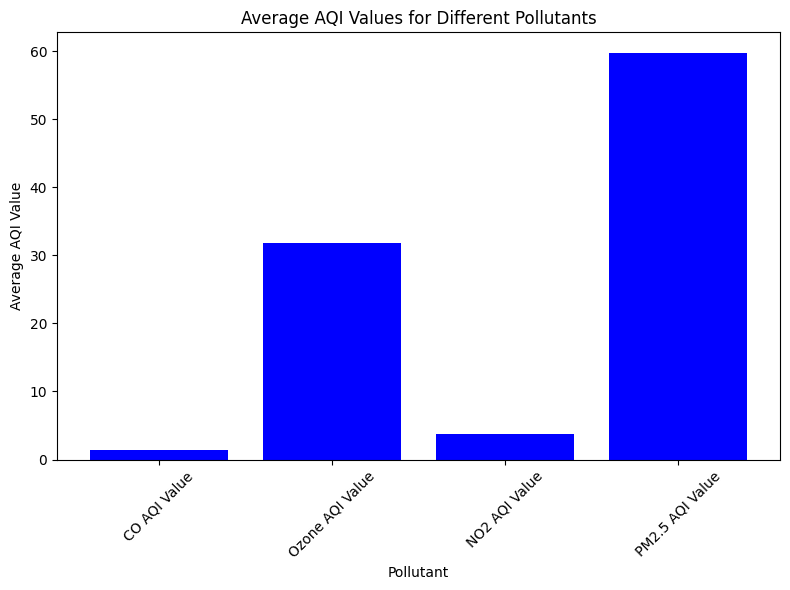

In [5]:
# Section 4: Which pollutant has the highest average AQI value?
pollutant_aqi_avg = data[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].mean()
pollutant_with_highest_avg_aqi = pollutant_aqi_avg.idxmax()
print("Pollutant with the highest average AQI value:", pollutant_with_highest_avg_aqi)

# Create a bar plot to visualize the average AQI values for each pollutant
plt.figure(figsize=(8, 6))
plt.bar(pollutant_aqi_avg.index, pollutant_aqi_avg.values, color='blue')
plt.xlabel('Pollutant')
plt.ylabel('Average AQI Value')
plt.title('Average AQI Values for Different Pollutants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

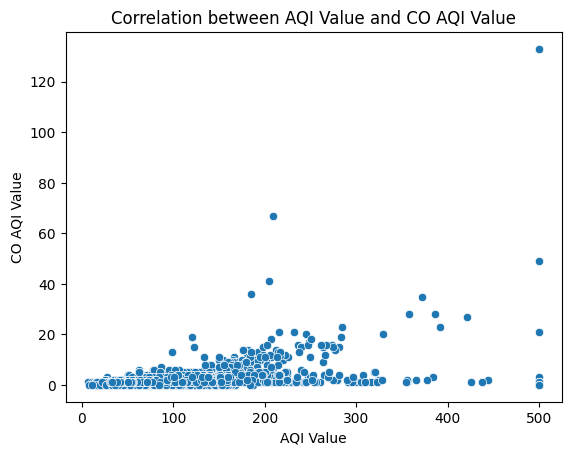

In [6]:
# Section 5: How does the AQI value correlate with the CO AQI value?
sns.scatterplot(data=data, x='AQI Value', y='CO AQI Value')
plt.title('Correlation between AQI Value and CO AQI Value')
plt.show()

Cities with the highest CO AQI values:
           City  CO AQI Value
3768    Durango           133
3769    Durango           133
3770    Durango           133
9286       Miri            67
12994  Boksburg            49


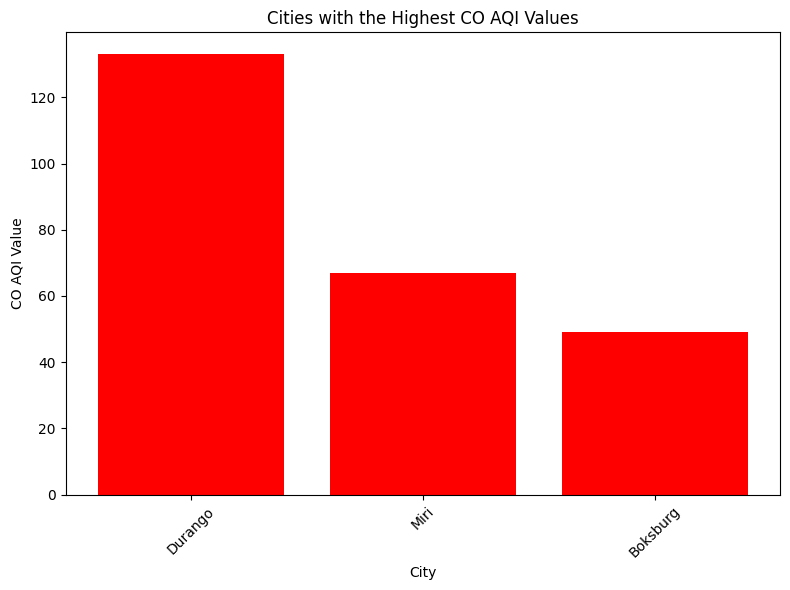

In [7]:
# Section 6: Which cities have the highest CO AQI values?
top_cities_highest_co_aqi = data.nlargest(5, 'CO AQI Value')
print("Cities with the highest CO AQI values:")
print(top_cities_highest_co_aqi[['City', 'CO AQI Value']])

# Create a bar plot to visualize the cities with the highest CO AQI values
plt.figure(figsize=(8, 6))
plt.bar(top_cities_highest_co_aqi['City'], top_cities_highest_co_aqi['CO AQI Value'], color='r')
plt.xlabel('City')
plt.ylabel('CO AQI Value')
plt.title('Cities with the Highest CO AQI Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Cities with the highest levels of ozone pollution:
         City  Ozone AQI Value
7953    Karaj              222
13119     Qom              214
6903    Jinan              210
9286     Miri              209
10584  Cikupa              207


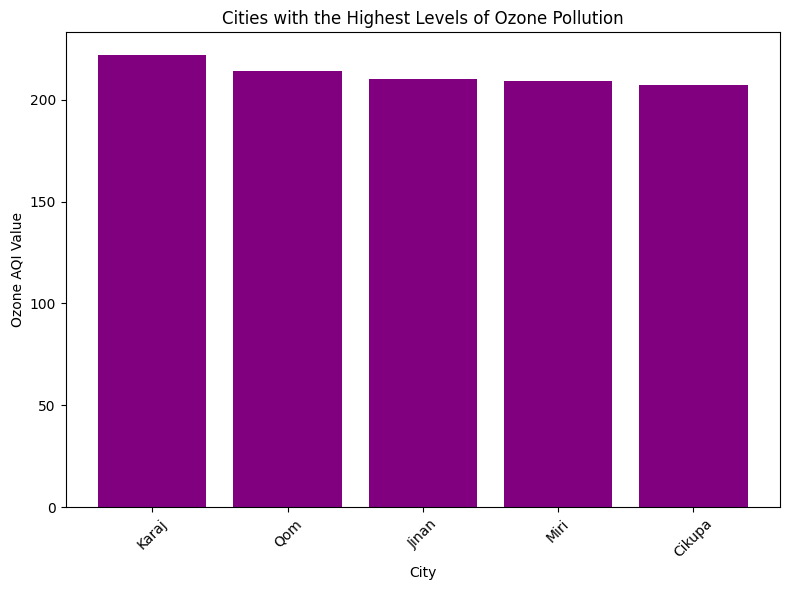

In [8]:
# Section 7: Which cities have the highest levels of ozone pollution?
top_cities_highest_ozone = data.nlargest(5, 'Ozone AQI Value')
print("Cities with the highest levels of ozone pollution:")
print(top_cities_highest_ozone[['City', 'Ozone AQI Value']])

# Create a bar plot to visualize the cities with the highest levels of ozone pollution
plt.figure(figsize=(8, 6))
plt.bar(top_cities_highest_ozone['City'], top_cities_highest_ozone['Ozone AQI Value'], color='purple')
plt.xlabel('City')
plt.ylabel('Ozone AQI Value')
plt.title('Cities with the Highest Levels of Ozone Pollution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

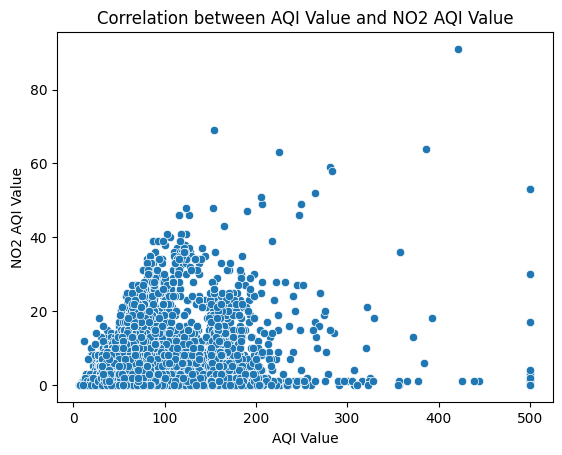

In [9]:
# Section 8: How does the AQI value correlate with the NO2 AQI value?
sns.scatterplot(data=data, x='AQI Value', y='NO2 AQI Value')
plt.title('Correlation between AQI Value and NO2 AQI Value')
plt.show()

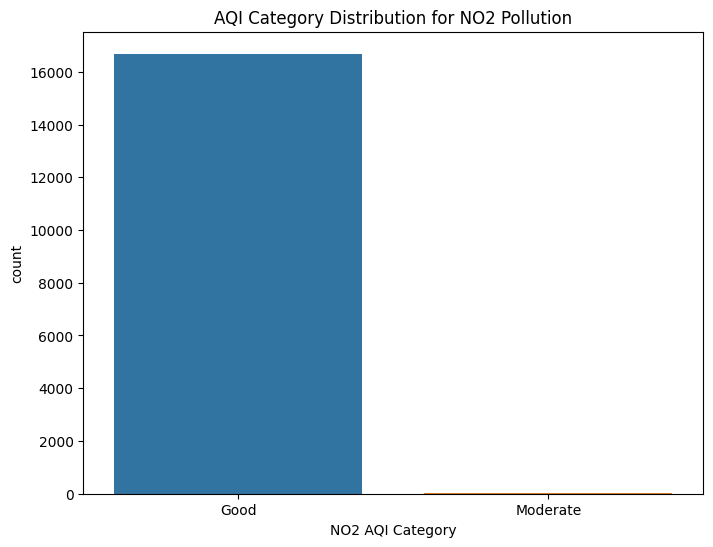

In [10]:
# Section 9: What is the AQI category distribution for NO2 pollution?
no2_category_counts = data['NO2 AQI Category'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='NO2 AQI Category', order=no2_category_counts.index)
plt.title('AQI Category Distribution for NO2 Pollution')
plt.show()

Cities with the highest NO2 AQI values:
               City  NO2 AQI Value
960           Seoul             91
2839        Algiers             69
8551        Chengdu             64
8338  Rangkasbitung             63
3571          Curug             59


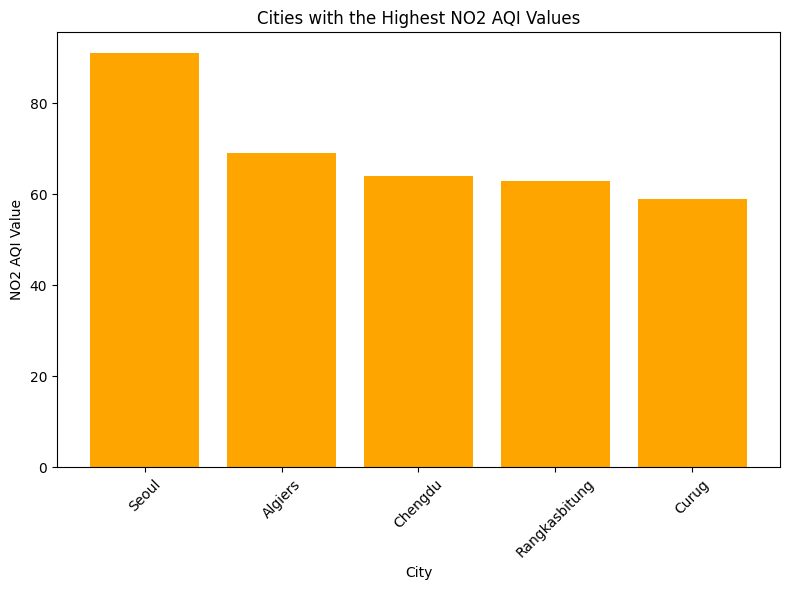

In [11]:
# Section 10: Which cities have the highest NO2 AQI values?
top_cities_highest_no2 = data.nlargest(5, 'NO2 AQI Value')
print("Cities with the highest NO2 AQI values:")
print(top_cities_highest_no2[['City', 'NO2 AQI Value']])

# Create a bar plot to visualize the cities with the highest NO2 AQI values
plt.figure(figsize=(8, 6))
plt.bar(top_cities_highest_no2['City'], top_cities_highest_no2['NO2 AQI Value'], color='orange')
plt.xlabel('City')
plt.ylabel('NO2 AQI Value')
plt.title('Cities with the Highest NO2 AQI Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

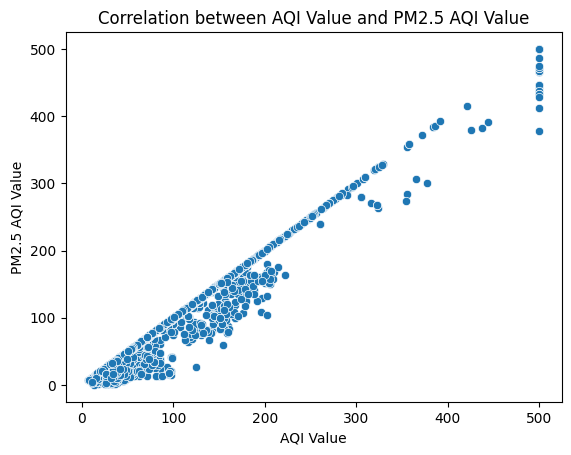

In [12]:
# Section 11: How does the AQI value correlate with the PM2.5 AQI value?
sns.scatterplot(data=data, x='AQI Value', y='PM2.5 AQI Value')
plt.title('Correlation between AQI Value and PM2.5 AQI Value')
plt.show()

Cities with the highest levels of PM2.5 pollution:
            City  PM2.5 AQI Value
3768     Durango              500
3769     Durango              500
3770     Durango              500
3853       Nohar              500
5924  Sardulgarh              500


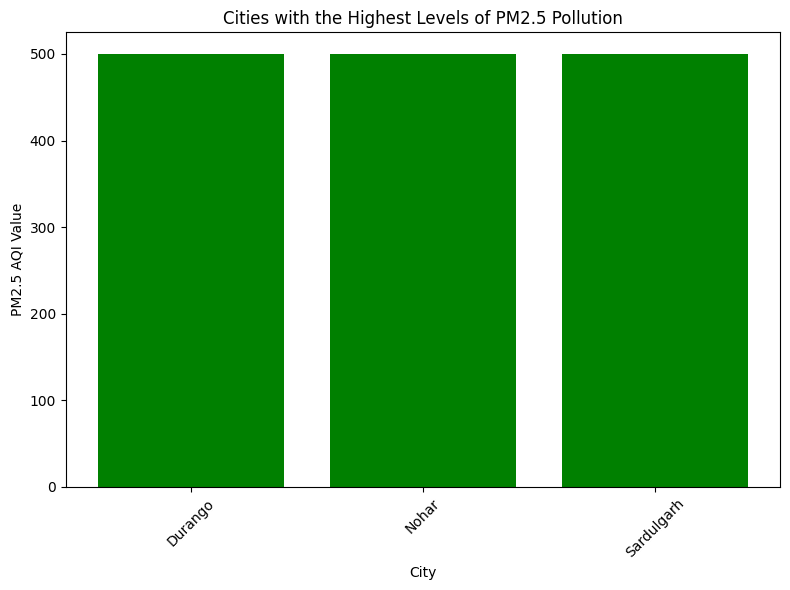

In [13]:
# Section 12: Which cities have the highest levels of PM2.5 pollution?
top_cities_highest_pm25 = data.nlargest(5, 'PM2.5 AQI Value')
print("Cities with the highest levels of PM2.5 pollution:")
print(top_cities_highest_pm25[['City', 'PM2.5 AQI Value']])

# Create a bar plot to visualize the cities with the highest levels of PM2.5 pollution
plt.figure(figsize=(8, 6))
plt.bar(top_cities_highest_pm25['City'], top_cities_highest_pm25['PM2.5 AQI Value'], color='green')
plt.xlabel('City')
plt.ylabel('PM2.5 AQI Value')
plt.title('Cities with the Highest Levels of PM2.5 Pollution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Section 13: Is there a geographical pattern in the AQI values based on latitude and longitude?
fig = px.scatter_mapbox(data, lat='lat', lon='lng', color='AQI Value',
                        hover_name='City', hover_data=['Country', 'AQI Value'],
                        title='Geographical Pattern of AQI Values')
fig.update_layout(mapbox_style='open-street-map')
fig.show()

Countries with the most cities with poor air quality:
India          323
China          146
Pakistan        78
Mexico          41
Philippines     32
Name: Country, dtype: int64


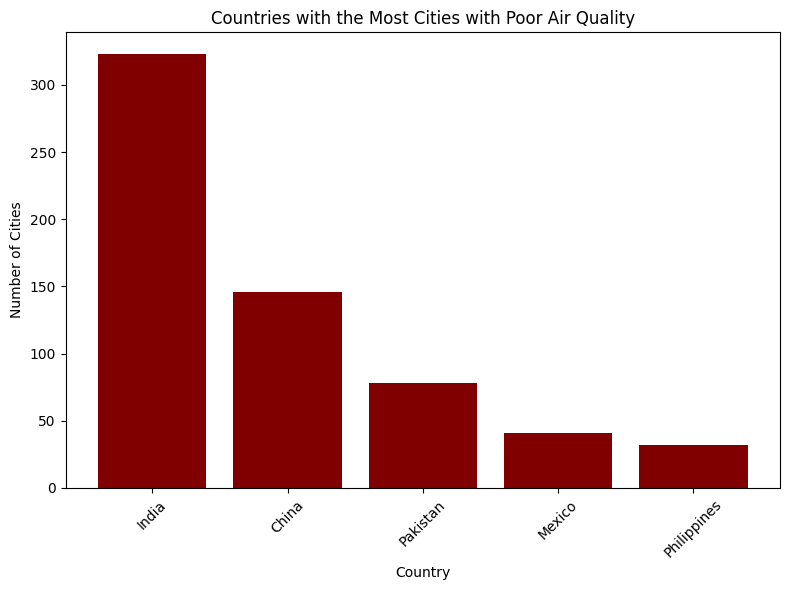

In [15]:
# Section 14: Which country has the most cities with poor air quality (high AQI values)?
country_most_cities_poor_air = data[data['AQI Category'] == 'Unhealthy']['Country'].value_counts().nlargest(5)
print("Countries with the most cities with poor air quality:")
print(country_most_cities_poor_air)

# Create a bar plot to visualize the countries with the most cities with poor air quality
plt.figure(figsize=(8, 6))
plt.bar(country_most_cities_poor_air.index, country_most_cities_poor_air.values, color='maroon')
plt.xlabel('Country')
plt.ylabel('Number of Cities')
plt.title('Countries with the Most Cities with Poor Air Quality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 5 cities that consistently have good air quality:
San Juan       14
Springfield    12
Victoria       12
Pilar          11
San Antonio    11
Name: City, dtype: int64


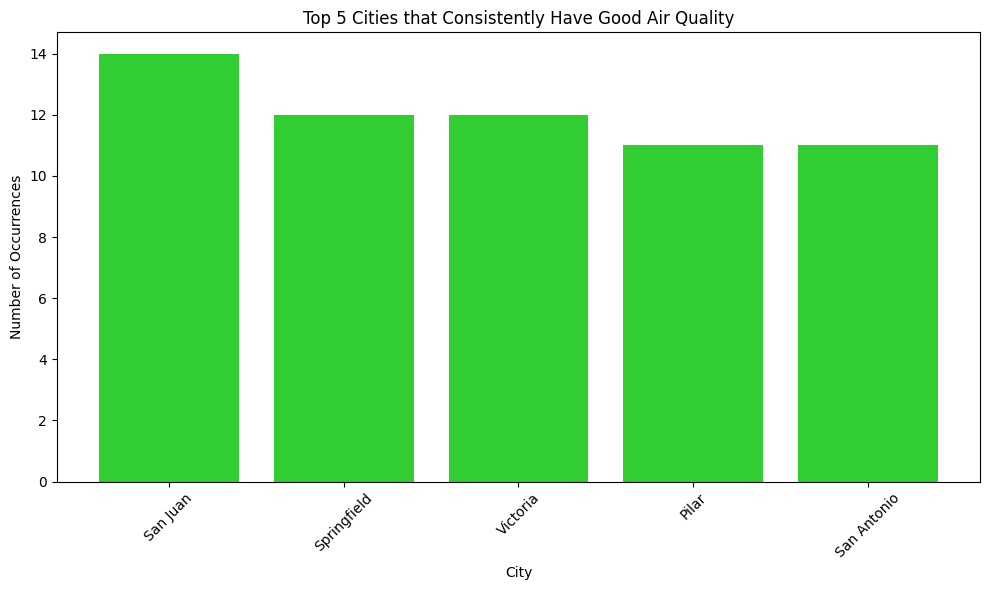

In [16]:
# Section 15: Top 5 cities that consistently have good air quality (low AQI values)?
top_5_cities_good_air = data[data['AQI Category'] == 'Good']['City'].value_counts().nlargest(5)

# Print the top 5 cities that consistently have good air quality
print("Top 5 cities that consistently have good air quality:")
print(top_5_cities_good_air)

# Create a bar plot to visualize the top 5 cities that consistently have good air quality
plt.figure(figsize=(10, 6))
plt.bar(top_5_cities_good_air.index, top_5_cities_good_air.values, color='limegreen')
plt.xlabel('City')
plt.ylabel('Number of Occurrences')
plt.title('Top 5 Cities that Consistently Have Good Air Quality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

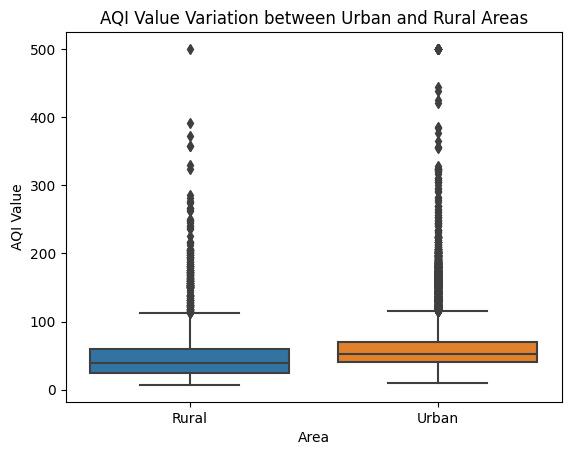

In [17]:
# Section 16: How does the AQI value differ between urban and rural areas?
data['Area'] = pd.cut(data['lat'], bins=[-90, 0, 90], labels=['Rural', 'Urban'])
sns.boxplot(data=data, x='Area', y='AQI Value')
plt.title('AQI Value Variation between Urban and Rural Areas')
plt.show()

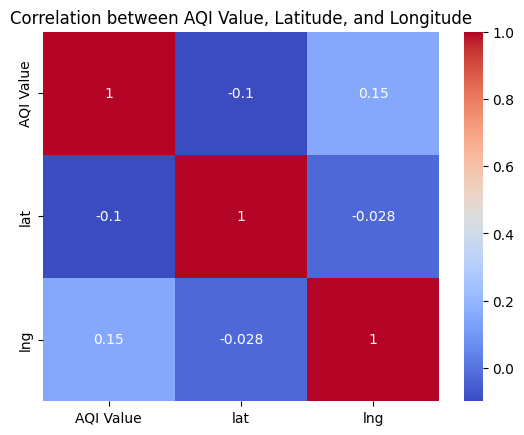

In [18]:
# Section 17: Is there any significant correlation between the latitude/longitude and the AQI values?
sns.heatmap(data[['AQI Value', 'lat', 'lng']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between AQI Value, Latitude, and Longitude')
plt.show()